### Importing necessary modules

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

### Load Dataset & put it on pandas dataframe

Mounting Drive into the Colab meaning that setting up the google drive account as a virtual drive so that i can access the resources of the drive just like a local hard drive.

In [3]:
anz = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
anz.head(10)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,...,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,...,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NaN,Kristin,...,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,NaN,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NaN,Tonya,...,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,...,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit


### Summary of a DataFrame

In [4]:
anz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

### Dropdown the unecessary column

In [5]:
r_anz=anz[["customer_id","age","gender","txn_description","balance","amount","movement","date"]]
r_anz.head(10)

,customer_id,age,gender,txn_description,balance,amount,movement,date
0,CUS-2487424745,26,F,POS,35.39,16.25,debit,2018-08-01
1,CUS-2487424745,26,F,SALES-POS,21.20,14.19,debit,2018-08-01
2,CUS-2142601169,38,M,POS,5.71,6.42,debit,2018-08-01
3,CUS-1614226872,40,F,SALES-POS,2117.22,40.90,debit,2018-08-01
4,CUS-2487424745,26,F,SALES-POS,17.95,3.25,debit,2018-08-01
5,CUS-2688605418,20,M,PAYMENT,1705.43,163.00,debit,2018-08-01
6,CUS-4123612273,43,F,SALES-POS,1248.36,61.06,debit,2018-08-01
7,CUS-4123612273,43,F,POS,1232.75,15.61,debit,2018-08-01
8,CUS-3026014945,27,F,POS,213.16,19.25,debit,2018-08-01
9,CUS-2031327464,40,M,INTER BANK,466.58,21.00,debit,2018-08-01


### Check out missing or null value present in dataframe

In [6]:
r_anz.isnull().sum()

customer_id        0
age                0
gender             0
txn_description    0
balance            0
amount             0
movement           0
date               0
dtype: int64

### Counts of unique values

In [7]:
r_anz['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

### Distribution plot of balance

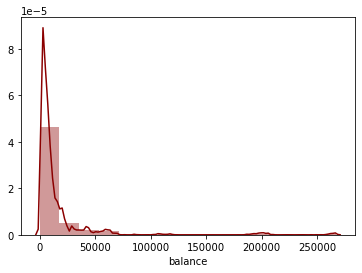

In [11]:
sns.distplot(r_anz['balance'].dropna(),color='darkred',bins=15)

Filtration the dataframe,choose data point with PAY/SALARY 'txn_description' & credit 'movement'. Creat new column annual_sal which is quater times multiple of amount. Categorical features encoding use simple mapping on binary features(gender). Set index with customer_id. As priviously filtration of dataframe,dropdown txn_description,movement.

In [12]:
sal_anz = r_anz[(r_anz['txn_description'] == 'PAY/SALARY')& (r_anz['movement'] == 'credit')]
sal_anz['annual_sal'] = (round(sal_anz['amount']*4,3))
sal_anz['gender'] = sal_anz['gender'].apply(lambda x: 1 if x =='M' else (0 if x =='F' else None)) 
sal_anz.set_index(['customer_id'], inplace = True) 
sal_anz=sal_anz.drop(columns=['txn_description','movement'])
sal_anz.head(10)

,age,gender,balance,amount,date,annual_sal
customer_id,,,,,,
CUS-1462656821,23,1,8342.11,3903.95,2018-08-01,15615.80
CUS-2500783281,23,0,2040.58,1626.48,2018-08-01,6505.92
CUS-326006476,22,1,3158.51,983.36,2018-08-01,3933.44
CUS-1433879684,24,1,2517.66,1408.08,2018-08-01,5632.32
CUS-4123612273,43,0,2271.79,1068.04,2018-08-01,4272.16
CUS-2487424745,26,0,1017.52,1013.67,2018-08-01,4054.68
CUS-1196156254,34,0,16433.32,3903.73,2018-08-01,15614.92
CUS-1646621553,26,1,1796.37,1098.91,2018-08-01,4395.64
CUS-495599312,38,1,50383.16,2647.38,2018-08-01,10589.52


All statistical description including total count,mean,max,minimum,std.dev & IQR

In [13]:
sal_anz.describe()

,age,gender,balance,amount,annual_sal
count,883.000000,883.000000,883.000000,883.000000,883.000000
mean,32.631937,0.525481,16242.859049,1898.728029,7594.912118
std,12.276731,0.499633,30953.342656,1150.364621,4601.458485
min,18.000000,0.000000,735.660000,576.000000,2304.000000
25%,22.000000,0.000000,4309.995000,1013.670000,4054.680000
50%,30.000000,1.000000,7532.540000,1626.480000,6505.920000
75%,40.000000,1.000000,14370.765000,2538.680000,10154.720000
max,78.000000,1.000000,267128.520000,8835.980000,35343.920000



Pair plot between all features

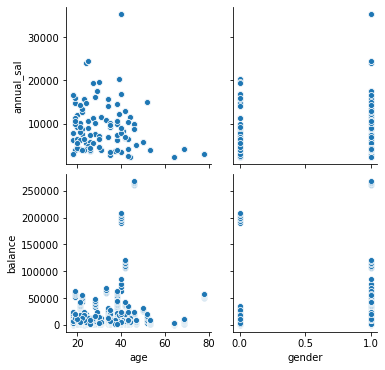

In [14]:
sns.pairplot(sal_anz,x_vars=['age','gender'],y_vars=['annual_sal', 'balance'])


Histogram of age

(array([414., 288., 142.,  13.,  26.]),
 array([18., 30., 42., 54., 66., 78.]),
 <a list of 5 Patch objects>)

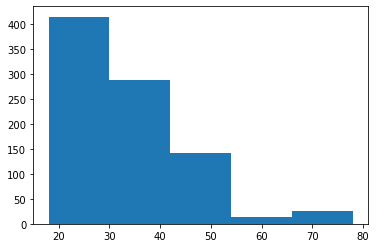

In [16]:
plt.hist(sal_anz['age'], bins=5)

In [17]:
from sklearn.model_selection import train_test_split 
import statsmodels.formula.api as smf
from sklearn import linear_model, metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score


Features Selection

In [18]:
x=sal_anz.loc[:,('gender','age','balance','amount')]
x.shape

(883, 4)

In [19]:
y=sal_anz.loc[:,('annual_sal')]
y.shape

(883,)


Split data into train set and training set

In [20]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=1)

In [21]:
X_train.head(5)

,gender,age,balance,amount
customer_id,,,,
CUS-1388323263,1,69,2840.39,1043.12
CUS-3325710106,1,20,8682.68,1099.70
CUS-55310383,0,30,6809.38,1636.72
CUS-511326734,1,23,1823.78,982.71
CUS-331942311,0,26,6548.23,1843.14


length of each train and test

In [22]:
len(X_train),len(y_train),len(X_test),len(y_test)

(618, 618, 265, 265)


OLS Model

In [23]:
fm = smf.ols(formula='annual_sal ~ gender+age+balance+amount', data=sal_anz).fit()

# print the coefficients
fm.params

Intercept    1.932676e-12
gender      -6.991741e-12
age         -3.663736e-14
balance      1.301043e-16
amount       4.000000e+00
dtype: float64

### OLS Model Summary

In [24]:
# print a summary of the fitted model
fm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             annual_sal   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.027e+31
Date:                Sat, 10 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:38:22   Log-Likelihood:                 21295.
No. Observations:                 883   AIC:                        -4.258e+04
Df Residuals:                     878   BIC:                        -4.256e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.933e-12   9.94e-13      1.944      0.052   -1.88e-14    3.88e-12
gender     -6.992e-12   5.61e-13    -12.456      0.000   -8.09e-12   -5.89e-12
age        -3.664e-14   2.33e-14     -1.571      0.116   -8.24e-14    9.12e-15
balance     1.301e-16   9.59e-18     13.572      0.000    1.11e-16    1.49e-16
amount         4.0000   2.58e-16   1.55e+16      0.000       4.000       4.000
==============================================================================
Omnibus:                      185.061   Durbin-Watson:                   0.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              838.696
Skew:                          -0.895   Prob(JB):                    7.58e-183
Kurtosis:                       7.426   Cond. No.                     1.28e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

LinearRegression Model and apply CrossValidation

In [25]:
fm1 = linear_model.LinearRegression()
scores = cross_val_score(fm1, x,y, cv=5,scoring='neg_mean_squared_error')
scores

array([-6.58589988e-23, -2.82596676e-23, -8.80339819e-24, -4.91843472e-24,
       -1.62792434e-23])

In [26]:
fm1.fit(X_train, y_train)

# print the coefficients
print(fm1.intercept_)
print(fm1.coef_)

-4.547473508864641e-12
[ 4.46432261e-16  3.03673753e-13 -5.55111512e-17  4.00000000e+00]


In [27]:
print("accuracy on train data", (fm1.score(X_train , y_train)))

accuracy on train data 1.0


In [28]:
# Making predictions

y_pred_fm1 = fm1.predict(X_test) 
print("accuracy on test data", fm1.score(X_test , y_test))

accuracy on test data 1.0


In [29]:
# Pair the feature names with the coefficients
list(zip(x, fm1.coef_))

[('gender', 4.46432261250089e-16),
 ('age', 3.0367375281059594e-13),
 ('balance', -5.551115123125783e-17),
 ('amount', 3.9999999999999973)]

### DecisionTreeRegressor Model with max_depth 5

In [30]:
dt = DecisionTreeRegressor(max_depth=5)
dt_scores = cross_val_score(dt, x,y, cv=5)
dt_scores

array([0.99853323, 0.9982717 , 0.99869871, 0.99701699, 0.9988111 ])

In [31]:
dt.fit(X_train, y_train) # Fit the model
y_pred_train_dt = dt.predict(X_train) #train model prediction
print("accuracy on train data", (dt.score(X_train , y_train))) # Model Score on train data 
y_pred_dt = dt.predict(X_test) # Making predictions
print(" accuracy on test Data", dt.score(X_test , y_test)) # Model Score on test data

accuracy on train data 0.9980306118489595
 accuracy on test Data 0.9975505932575178
